<a href="https://colab.research.google.com/github/asepmuhidin/web-covid19/blob/master/Covid19Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafik Perkembangan Kasus Covid-19 di Indonesia
## Python - API - JSON - Pandas

In [1]:
## Install library requests
!pip install requests

## Dapatkan URL API kawal korona

In [0]:
url_ina="https://api.kawalcorona.com/indonesia/"
url_prov="https://api.kawalcorona.com/indonesia/provinsi/"

In [3]:
##import requests
import requests

##dapatkan data JSON dari API 
json_ina=requests.get(url_ina).json()
print(json_ina)

[{'name': 'Indonesia', 'positif': '2,738', 'sembuh': '204', 'meninggal': '221'}]


In [0]:
##Ambil data positif, sembuh dan meninggal
positif=json_ina[0]['positif']
sembuh=json_ina[0]['sembuh']

meninggal=json_ina[0]['meninggal']

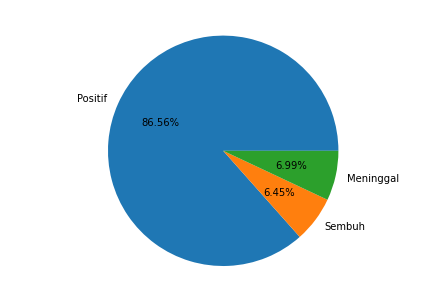

In [5]:
##import matplotlib
import matplotlib.pyplot as plt
## buat grafik pie
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
kasus = ['Positif', 'Sembuh', 'Meninggal']
jumlah = [int(positif.replace(',','')),int(sembuh),int(meninggal)]
ax.pie(jumlah, labels = kasus,autopct='%1.2f%%')
plt.show()

#Grafik Perkembangan Kasus Covid di Seluruh Provinsi Indonesia

In [0]:
#Ambil data dari API kawalcoron : https://api.kawalcorona.com/indonesia/provinsi/
# hasil request dirubah menjadi JSON

r=requests.get(url_prov)
jdata=r.json()

In [0]:
# Lihat Struktur data yang dihasilkan 
import json
print(json.dumps(jdata,indent=4))

In [0]:
# Konversikan menjadi dataframe
fid,kode_prov,provinsi,positif,sembuh,meninggal=[],[],[],[],[],[]
for data in jdata:
  fid.append(data['attributes']['FID'])
  kode_prov.append(data['attributes']['Kode_Provi'])
  provinsi.append(data['attributes']['Provinsi'])
  positif.append(data['attributes']['Kasus_Posi'])
  sembuh.append(data['attributes']['Kasus_Semb'])
  meninggal.append(data['attributes']['Kasus_Meni'])

#konversi menjadi dataframe
import pandas as pd
df=pd.DataFrame({
    'FID':fid,
    'Kode_Prov':kode_prov,
    'Provinsi' :provinsi,
    'Positif' : positif,
    'Sembuh':sembuh,
    'Meninggal' :meninggal
})


In [17]:
# Lihat hasil dataframe
df.head(10)

,FID,Kode_Prov,Provinsi,Positif,Sembuh,Meninggal
0,11,31,DKI Jakarta,1369,65,106
1,12,32,Jawa Barat,343,17,29
2,15,35,Jawa Timur,194,41,16
3,16,36,Banten,194,7,18
4,13,33,Jawa Tengah,133,14,22
5,27,73,Sulawesi Selatan,127,21,6
6,17,51,Bali,43,18,2
7,14,34,Daerah Istimewa Yogyakarta,41,1,3
8,23,64,Kalimantan Timur,31,1,1
9,2,12,Sumatera Utara,26,0,4


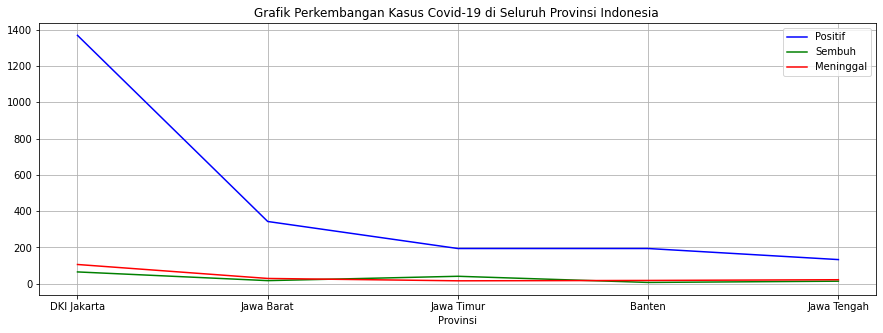

In [19]:
#tampilkan dalam grafik
plt.subplots(figsize=(15,5))
plt.title("Grafik Perkembangan Kasus Covid-19 di Seluruh Provinsi Indonesia ")
plt.grid(True)
plt.plot(df.Provinsi[:5],df.Positif[:5], c="blue", label="Positif")
plt.plot(df.Provinsi[:5],df.Sembuh[:5], c="green", label="Sembuh")
plt.plot(df.Provinsi[:5],df.Meninggal[:5], c="red", label="Meninggal")
plt.xlabel("Provinsi")
plt.legend(loc="upper right")
plt.show()